## Text Analysis

**Reference: ** An interesting read for the introduction to [Natural Language Processing](https://blog.monkeylearn.com/the-definitive-guide-to-natural-language-processing/)

In [56]:
%pprint

Pretty printing has been turned OFF


----
### Data

Lets get started with our text analysis with the twenty newsgroup data set. The data can be downloaded using the inbuilt methods of scikit learn library. We will explore the data a bit before delving into text analysis.

One primary use of the early Internet was to share information among interested groups via newsgroups. Users could subscribe to these groups to send and receive postings of interest. This dataset has postings to twenty newsgroups, thus the newsgroup is the classification target and the text in the posting is used to make the features. The postings are similar to emails, thus each posting will have a header, the article body, which might quote all or part of a previous message, and possibly a footer. The header, quoted text, and the footer can be removed by scikit learn by including the remove attribute, and indicating whether these sections should be removed. This attribute can take one or all of the values: header, footer, and quotes. For example, the following attribute would be used to remove both headers and footers.

    `remove =('headers', 'footers')`

------

The sklearn.datasets.fetch_20newsgroups() is a data fetching / caching function that downloads the data archive from the original 20 newsgroups website, extracts the archive contents in the ~/scikit_learn_data/20news_home folder and calls the sklearn.datasets.load_files. There are train and test version of this data that you can load by supplying subset='train'/'test' option.

In [57]:
# load dataset
from sklearn.datasets import fetch_20newsgroups

text_data = fetch_20newsgroups(data_home='/dsa/data/DSA-8630/newsgroups/')

# To learn more about these data, use scikit learn documentation, or enter help(text_data) in an IPython code cell

In [58]:
# The data can be accessed via Dictionary keys
print(text_data.keys())

dict_keys(['description', 'target_names', 'DESCR', 'filenames', 'target', 'data'])


In [59]:
print(text_data['target'])

[7 4 4 ..., 3 1 8]


In [60]:
print(text_data['filenames'])

[ '/dsa/data/DSA-8630/newsgroups/20news_home/20news-bydate-train/rec.autos/102994'
 '/dsa/data/DSA-8630/newsgroups/20news_home/20news-bydate-train/comp.sys.mac.hardware/51861'
 '/dsa/data/DSA-8630/newsgroups/20news_home/20news-bydate-train/comp.sys.mac.hardware/51879'
 ...,
 '/dsa/data/DSA-8630/newsgroups/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695'
 '/dsa/data/DSA-8630/newsgroups/20news_home/20news-bydate-train/comp.graphics/38319'
 '/dsa/data/DSA-8630/newsgroups/20news_home/20news-bydate-train/rec.motorcycles/104440']


In [61]:
print(text_data['target_names'])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


----
The real data lies in the filenames and target attributes. The target attribute is the integer index of the category. Lets print the number of records in the data at hand. Also print first target names for first 10 rows.

----

In [62]:
print(text_data.filenames.shape)

print(text_data.target.shape)

text_data.target[:10]

(11314,)
(11314,)


array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [63]:
# Display target names, i.e., the names of the twenty news groups

for index, label in enumerate(text_data['target_names']):
    print('Class {0} = {1}'.format(index, label))

Class 0 = alt.atheism
Class 1 = comp.graphics
Class 2 = comp.os.ms-windows.misc
Class 3 = comp.sys.ibm.pc.hardware
Class 4 = comp.sys.mac.hardware
Class 5 = comp.windows.x
Class 6 = misc.forsale
Class 7 = rec.autos
Class 8 = rec.motorcycles
Class 9 = rec.sport.baseball
Class 10 = rec.sport.hockey
Class 11 = sci.crypt
Class 12 = sci.electronics
Class 13 = sci.med
Class 14 = sci.space
Class 15 = soc.religion.christian
Class 16 = talk.politics.guns
Class 17 = talk.politics.mideast
Class 18 = talk.politics.misc
Class 19 = talk.religion.misc


----
In above print statement {0} represents first argument in print statement. Here it is index variable, {1} refers to second argument which is label here. 

**Reference: ** [enumerate()](https://docs.python.org/2.3/whatsnew/section-enumerate.html)

Lets display a single message and see what all data is stored. If you look at the following line of code in below code cell,

    text_data['target_names'][text_data['target'][messageID]]

target is similar to target_names except that it is numeric coding of names. The second part of the code i'e, **text_data['target'][messageID]** will give the target number of 1st message. The first part i'e **text_data['target_names'][second part of code]** then uses this target number to print the target_name

-----

In [64]:
messageID = 1000

print(text_data['target_names'])
print(text_data['target'])
print(text_data['target'][messageID])
print("=======")

print('Target Newsgroup: {0}'.format(text_data['target_names'][text_data['target'][messageID]]))
print(70*'-')

message = text_data['data'][messageID]
print(message)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
[7 4 4 ..., 3 1 8]
2
Target Newsgroup: comp.os.ms-windows.misc
----------------------------------------------------------------------
From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)
Subject: Diamond SS24X, Win 3.1, Mouse cursor
Organization: National Library of Medicine
Lines: 10


Anybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?
Sorry, don't know the version of the driver (no indication in the menus) but it's a recently
delivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered
if anyone else had seen this.

post or email

--Don Lindbergh
d

-----

We can analyze text messages by using basic Python commands. For example, we can find how many times a word appears in a text by using Python string functions. One important item to consider, however, is that, by default, Python will search for sequences of characters in a text message. Thus, if a word is also part of larger words, we will over-count the occurrences, as demonstrated in the following code cell. 

Observe the output of two print statements below. format(token) is inserting a space before 'to' so that it can be used to search for the word 'to'. 

-----

In [65]:
token = 'to'

# Create isolated words. words that are not part of any larger word. For example, to in 'distortion' is not counted as a word.
# format(token) will result in creating a token which can be used as stanalone word for search.
i_token = ' {0} '.format(token)

print('plain word:',token)
print('formatted word:',i_token)

plain word: to
formatted word:  to 


-----

The word 'to' has appeared twice i'e in 'distortion' and as 'to'. So when you search for number of times 'to' appeared in the text it will return 2. To avoid this, the formatted text resulted in creating a token that matched only the stanalone word 'to' resulting in count 1

-----

In [66]:
print('Expression over count: {0}'.format(message.count(token)))
print('Isolated Token Count: {0}'.format(message.count(i_token)))

Expression over count: 2
Isolated Token Count: 1


-----

Above limitation where expression is over counted can be over come by explicitly splitting a text into tokens. By default, in Python this is done at whitespace, but this can be changed using regular expressions which we will come across later in this notebook. 


**Reference: ** [format()](https://docs.python.org/2/tutorial/inputoutput.html) can be used to format Input/Output operations in print statements. 

----

In [67]:
# Accumulate counts of tokens, using string functionality
import collections as col

# Used to print sequences in a nice manner
import pprint
pp = pprint.PrettyPrinter(indent=2, depth=2, width=80,compact=True)

# Tokenize the message and create a counter for frequency of each word in message.
# Browse for split() python or go to this link http://www.pythonforbeginners.com/dictionary/python-split to see what split() does
words = message.split()
words

['From:', 'dabl2@nlm.nih.gov', '(Don', 'A.B.', 'Lindbergh)', 'Subject:', 'Diamond', 'SS24X,', 'Win', '3.1,', 'Mouse', 'cursor', 'Organization:', 'National', 'Library', 'of', 'Medicine', 'Lines:', '10', 'Anybody', 'seen', 'mouse', 'cursor', 'distortion', 'running', 'the', 'Diamond', '1024x768x256', 'driver?', 'Sorry,', "don't", 'know', 'the', 'version', 'of', 'the', 'driver', '(no', 'indication', 'in', 'the', 'menus)', 'but', "it's", 'a', 'recently', 'delivered', 'Gateway', 'system.', 'Am', 'going', 'to', 'try', 'the', 'latest', 'drivers', 'from', 'Diamond', 'BBS', 'but', 'wondered', 'if', 'anyone', 'else', 'had', 'seen', 'this.', 'post', 'or', 'email', '--Don', 'Lindbergh', 'dabl2@lhc.nlm.nih.gov']

In [68]:
word_count = col.Counter(words)
word_count

Counter({'the': 5, 'Diamond': 3, 'but': 2, 'seen': 2, 'cursor': 2, 'of': 2, 'going': 1, 'Lindbergh': 1, 'anyone': 1, 'Lindbergh)': 1, 'system.': 1, 'drivers': 1, 'From:': 1, 'Subject:': 1, '1024x768x256': 1, 'driver': 1, 'had': 1, 'email': 1, 'Anybody': 1, 'Sorry,': 1, '(no': 1, 'a': 1, 'indication': 1, '10': 1, 'if': 1, 'driver?': 1, 'to': 1, 'Am': 1, 'delivered': 1, 'menus)': 1, 'Library': 1, 'A.B.': 1, 'dabl2@nlm.nih.gov': 1, 'mouse': 1, 'Lines:': 1, 'wondered': 1, 'or': 1, "don't": 1, 'National': 1, 'Mouse': 1, 'version': 1, 'recently': 1, 'Organization:': 1, 'distortion': 1, 'BBS': 1, '3.1,': 1, 'from': 1, 'Gateway': 1, 'post': 1, 'know': 1, 'SS24X,': 1, 'else': 1, 'latest': 1, "it's": 1, 'Medicine': 1, 'dabl2@lhc.nlm.nih.gov': 1, 'Win': 1, '--Don': 1, 'this.': 1, '(Don': 1, 'try': 1, 'in': 1, 'running': 1})

In [69]:
# Setting the limit to 40 for the number of tokens to display 
counts_to_display = 40

# Display results. 
print('Total number of tokens = {0}'.format(len(word_count)))
print(30*'-')
print('Top {} tokens by frequency:'.format(counts_to_display))
print(30*'-')
pp.pprint(word_count.most_common(counts_to_display))

Total number of tokens = 63
------------------------------
Top 40 tokens by frequency:
------------------------------
[ ('the', 5), ('Diamond', 3), ('but', 2), ('seen', 2), ('cursor', 2), ('of', 2),
  ('going', 1), ('Lindbergh', 1), ('anyone', 1), ('Lindbergh)', 1),
  ('system.', 1), ('drivers', 1), ('From:', 1), ('Subject:', 1),
  ('1024x768x256', 1), ('driver', 1), ('had', 1), ('email', 1), ('Anybody', 1),
  ('Sorry,', 1), ('(no', 1), ('a', 1), ('indication', 1), ('10', 1), ('if', 1),
  ('driver?', 1), ('to', 1), ('Am', 1), ('delivered', 1), ('menus)', 1),
  ('Library', 1), ('A.B.', 1), ('dabl2@nlm.nih.gov', 1), ('mouse', 1),
  ('Lines:', 1), ('wondered', 1), ('or', 1), ("don't", 1), ('National', 1),
  ('Mouse', 1)]


------

**Reference: ** [counter](https://docs.python.org/2/library/collections.html#collections.Counter): A Counter is a subclass in collections class for counting hashable objects. It is an unordered collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts. most_common() is a method in Counter class to that returns a list of the n most common elements and their counts from the most common to the least. In previous cell we used most_common() method to print the 40 most common words in the text accrording to their frequency.

The previous cells tokenized a text document, but identical tokens with different case will be treated as distinct which is not an ideal behavior since it could undercount the occurrences of an otherwise important token. Convert text to lowercase to prevent this, by using the string lower method. The word mouse has appeared twice as [mouse, Mouse] before converting the text to lowercase. After making it to lowercase, the total number of tokens has decreased by 1, as well as the counts of specific tokens has chnaged(such as mouse count is increased from 1 to 2 while Mouse si no longer a token).

------

In [70]:
words = message.lower().split()
word_count = col.Counter(words)

# Setting the limit to 40 for the number of tokens to display 
counts_to_display = 40

# Display results. 
print('Total number of tokens = {0}'.format(len(word_count)))
print(30*'-')
print('Top {} tokens by frequency:'.format(counts_to_display))
print(30*'-')
pp.pprint(word_count.most_common(counts_to_display))

Total number of tokens = 62
------------------------------
Top 40 tokens by frequency:
------------------------------
[ ('the', 5), ('diamond', 3), ('but', 2), ('seen', 2), ('mouse', 2),
  ('cursor', 2), ('of', 2), ('going', 1), ('anybody', 1), ('anyone', 1),
  ('system.', 1), ('drivers', 1), ('gateway', 1), ('a.b.', 1), ('subject:', 1),
  ('or', 1), ('driver', 1), ('had', 1), ('email', 1), ('national', 1),
  ('(no', 1), ('a', 1), ('indication', 1), ('10', 1), ('library', 1),
  ('(don', 1), ('am', 1), ('driver?', 1), ('to', 1), ('--don', 1),
  ('delivered', 1), ('menus)', 1), ('medicine', 1), ('lindbergh)', 1),
  ('dabl2@nlm.nih.gov', 1), ('this.', 1), ('bbs', 1), ("don't", 1),
  ('sorry,', 1), ('1024x768x256', 1)]


-----

## Vector Space Model


The traditional machine learning algorithms can only operate directly on numerical data. A text document can be analyzed by generating a numerical representation by counting the number of times a word occurs (as we did with the Counter collection previously. Another approach is to normalize the token counts by the total number of tokens, which creates a term (or token) frequency. In below code cell, the top terms and their frequency in the message is displayed.


**Reference: ** 

- Wikipedia article on [Vector Space model](https://en.wikipedia.org/wiki/Vector_space_model)
- Wikipedia article on [Document Term Matrix](https://en.wikipedia.org/wiki/Document-term_matrix)


----

In [71]:
# In below print statememt, {0:12s} means, print argument 1 with 12 spaces allocated for it. 
print('{0:12s}: {1}'.format('Term', 'Frequency'))
print(20*'-')

total_word_count = sum(word_count.values())
for count in word_count.most_common(counts_to_display):
    pp.pprint('{0:12s}: {1:4.3f}'.format(count[0], count[1]/total_word_count))

Term        : Frequency
--------------------
'the         : 0.068'
'diamond     : 0.041'
'but         : 0.027'
'seen        : 0.027'
'mouse       : 0.027'
'cursor      : 0.027'
'of          : 0.027'
'going       : 0.014'
'anybody     : 0.014'
'anyone      : 0.014'
'system.     : 0.014'
'drivers     : 0.014'
'gateway     : 0.014'
'a.b.        : 0.014'
'subject:    : 0.014'
'or          : 0.014'
'driver      : 0.014'
'had         : 0.014'
'email       : 0.014'
'national    : 0.014'
'(no         : 0.014'
'a           : 0.014'
'indication  : 0.014'
'10          : 0.014'
'library     : 0.014'
'(don        : 0.014'
'am          : 0.014'
'driver?     : 0.014'
'to          : 0.014'
'--don       : 0.014'
'delivered   : 0.014'
'menus)      : 0.014'
'medicine    : 0.014'
'lindbergh)  : 0.014'
'dabl2@nlm.nih.gov: 0.014'
'this.       : 0.014'
'bbs         : 0.014'
"don't       : 0.014"
'sorry,      : 0.014'
'1024x768x256: 0.014'


------

### Bag of words

Did it occur to your mind, how can you classify text data made up of words when machine learning algorithms work on numerical data. The only way is to build a numerical summary of the data that the algorithms can work on. An easy approach to implement this idea is to identify all possible words in the documents and to track the number of times each word occurs. In the context of this notebook, each post is a document. This produces a (very) sparse matrix of the documents, where the columns are the possible words (or tokens) and the rows are different documents (here posts).


This concept, where one tokenizes documents to build these sparse matrices is more formally known as bag of words, because we effectively create the bag of words out of which are documents are constructed. In this model, each document is mapped into a vector, where the individual elements in the vector correspond to the number of times the words (associated with the particular column) appears in the document.

For example, in the sentence, "This is a great place to eat. I would recommend this place to my friends," the word this is seen twice, the word place is seen twice, the word great is seen once. There's one feature for each word in bag of words. The data has to be pre processed like every other data. It will dramatically improve the performance of the Bag of Words method. 

**Reference: ** Wikipedia article on [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) model


-----

### CountVectorizer

With scikit learn, the CountVectorizer can be used to break the documents into tokens (in this case words), which are used to construct bag of words for the posts. Given this tokenizer, we first need to construct the list of tokens, which we do with the fit method. Second, we need to transform our documents into this sparse matrix, which we do with the transform method. Since both steps use the same input data, there is a convenience method to perform both operations at the same time, called fit_transform.

----

In [72]:
# Define our vectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word', lowercase=True)

In [112]:
text_data['data'][1:5]

["From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n", 'From: twillis@ec.ecn.purdue.edu (Thomas E Willis)\nSubject: PB questions...\nOrganization: Purdue University Enginee

**Reference: **

- [CountVectorizer documenttaion](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [CountVectorizer example](http://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/)

-----

Given the `CountVectorizer` we can see the number of words in our _bag_ as well as the number of documents on which we train, which in this case agrees with the values we obtained when we read in the data.

-----

In [74]:
# Build a vocabulary from our data
cv.fit(text_data['data'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [75]:
print(message)

From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)
Subject: Diamond SS24X, Win 3.1, Mouse cursor
Organization: National Library of Medicine
Lines: 10


Anybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?
Sorry, don't know the version of the driver (no indication in the menus) but it's a recently
delivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered
if anyone else had seen this.

post or email

--Don Lindbergh
dabl2@lhc.nlm.nih.gov



**Reference: **

- [Working with text - creating Document Term Matrix](https://de.dariah.eu/tatom/working_with_text.html)

In [76]:
# We can now process documents.

# We need an iteratable to apply cv.transform()
msg = []
msg.append(message)

# Transforming a single message is easier to comprehend. 
# By default, scikit learn uses sparse matrices for text processing
# It returns a Document Term Matrix (dtm)
dtm = cv.transform(msg)

In [77]:
msg

["From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)\nSubject: Diamond SS24X, Win 3.1, Mouse cursor\nOrganization: National Library of Medicine\nLines: 10\n\n\nAnybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?\nSorry, don't know the version of the driver (no indication in the menus) but it's a recently\ndelivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered\nif anyone else had seen this.\n\npost or email\n\n--Don Lindbergh\ndabl2@lhc.nlm.nih.gov\n"]

In [78]:
dtm

<1x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [79]:
# In sparse format number of tokens indicate size of dataset vocabulary. 
# So there is 1 document and 130107 featues in the dtm.
print('Number of Samples = {0}'.format(dtm.shape[0]))
print('Number of Tokens = {0}'.format(dtm.shape[1]))
print(80*'-')


# You can't explore the document-term matrix when it is in sparse form. 
# We can convert from sparse to dense form to explore 
# the document-term matrix. The range given below is chosen randomly. 
# Each word is a feature. Below zeros indicate the words/features 
# in columns 1000 to 1100, those words does not appear in 
# the input message. Thats why we have zeros for those cells
print(dtm.todense()[:,1000:1100])
print(80*'-')


# We can also print only nonzero DTM matrix elements. 
print('Cells from Document-Term Matrix[i, j] and c (Count)')
print(80*'-')

import scipy.sparse as sp

# Find non-zero elements. scipy.sparse.find() returns the 
# indices and values of the nonzero elements of a matrix.
# i,j contains the row and column indices where non zero matrix 
# entries are present while V has the entry's value.
i, j, V = sp.find(dtm)

Number of Samples = 1
Number of Tokens = 130107
--------------------------------------------------------------------------------
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
--------------------------------------------------------------------------------
Cells from Document-Term Matrix[i, j] and c (Count)
--------------------------------------------------------------------------------


In [80]:
i #rows

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [81]:
j #columns

array([  2336,   2643,  27721,  28604,  28615,  32185,  35805,  44124,
        44830,  46126,  47059,  47961,  48546,  49055,  49057,  51215,
        51268,  56979,  58245,  59686,  59893,  61546,  65798,  66608,
        66894,  68766,  73201,  74705,  75589,  75742,  75990,  76032,
        80816,  81150,  83955,  86155,  87284,  87546,  87626,  89362,
        90252,  90379,  95136,  99966, 103523, 105843, 108930, 109967,
       111322, 112674, 114455, 114731, 115475, 116722, 121234, 124397,
       124923], dtype=int32)

In [82]:
V #row-column values

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1])

In [83]:
dtm_list = list(zip(i, j, V))
pp.pprint(dtm_list)

[ (0, 2336, 1), (0, 2643, 1), (0, 27721, 1), (0, 28604, 1), (0, 28615, 1),
  (0, 32185, 1), (0, 35805, 2), (0, 44124, 2), (0, 44830, 2), (0, 46126, 1),
  (0, 47059, 3), (0, 47961, 1), (0, 48546, 3), (0, 49055, 2), (0, 49057, 1),
  (0, 51215, 1), (0, 51268, 1), (0, 56979, 2), (0, 58245, 1), (0, 59686, 1),
  (0, 59893, 2), (0, 61546, 1), (0, 65798, 1), (0, 66608, 1), (0, 66894, 1),
  (0, 68766, 1), (0, 73201, 1), (0, 74705, 1), (0, 75589, 1), (0, 75742, 1),
  (0, 75990, 2), (0, 76032, 1), (0, 80816, 1), (0, 81150, 1), (0, 83955, 2),
  (0, 86155, 1), (0, 87284, 2), (0, 87546, 2), (0, 87626, 1), (0, 89362, 2),
  (0, 90252, 1), (0, 90379, 1), (0, 95136, 1), (0, 99966, 1), (0, 103523, 1),
  (0, 105843, 2), (0, 108930, 1), (0, 109967, 1), (0, 111322, 1),
  (0, 112674, 1), (0, 114455, 5), (0, 114731, 1), (0, 115475, 1),
  (0, 116722, 1), (0, 121234, 1), (0, 124397, 1), (0, 124923, 1)]


-----

Look at the documentation for [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for what it returns. One of the things it returns is vocabulary_ which is a dictionary. Its a mapping of terms to feature indices/columns in dtm. So if you look at below cell it will return the column number in dtm where confuse exists as a column/feature in dtm. 

-----

In [84]:
print(cv.vocabulary_["confuse"])
# returns the column number of the feature column "confuse"

41911


----

**itemgetter()** returns an object that in turn fetches an item from its operand. If multiple items are specified, it returns a tuple of lookup values. Look at the documentation for [itemgetter()](https://docs.python.org/2/library/operator.html#). Search for itemgetter in the page. 

---

In [85]:
from operator import itemgetter

print(itemgetter(1,3,5)('ABCDEFG'))


# Lets look at another example on how itemgetter() words. 
# inventory is a list with 4 tuples
inventory = [('apple', 3), ('banana', 2), ('pear', 5), ('orange', 1)]

# getcount has an object that will fetch items at index 1 on what ever it is called upon.
getcount = itemgetter(1)

print("===========================")

# Since key=getcount, get count will fetch the 
# values 3,2,1,4 which are present at index 1 in inventory.
# Based on this keys the items in inventory are sorted
sorted(inventory, key=getcount)

('B', 'D', 'F')


[('orange', 1), ('banana', 2), ('apple', 3), ('pear', 5)]

-----

We can grab the words in our _bag of words_ by extracting the _vocabulary_. This allows us to see if words are present in the documents. We have created a list dtm_list with the frequencies of words that appeared in dtn and their row column indices. Below code cell prints the first 5 elemnets in the list. 

We can also find which term occurs most frequently, least frequently, as well as the overall top terms in following cells. 


----

In [86]:
dtm_list[0:5]

[(0, 2336, 1), (0, 2643, 1), (0, 27721, 1), (0, 28604, 1), (0, 28615, 1)]

In [87]:
max(dtm_list, key=itemgetter(2))

(0, 114455, 5)

In [88]:
# Explore the terms in the vocabulary
terms = cv.vocabulary_

# Look for a single term confuse
search_word = 'confuse'
print("Chosen Word ({0}): Column = {1}".format(search_word, terms[search_word]))

# Find the maximum value in dtm_list in 3rd column which will be 114455
max_key = max(dtm_list, key=itemgetter(2))[1]

# Find the minimum value in dtm_list in 3rd column which will be 2336
min_key = min(dtm_list, key=itemgetter(2))[1]

# In below two lines, terms.keys() will return all keys i'e the column names(words).
# For loop iterates over all this words to see get the column name 
# which matches the column index we have in max_key and min_key
x_max = [key for key in terms.keys() if terms[key] == max_key]
x_min = [key for key in terms.keys() if terms[key] == min_key]

print("-------------------")
print(x_max)
print(x_min)
print("-------------------")

# for loop above returned a list as output. So x_max is a list with a column name as same with x_min
print("Max Word ({0}): Column = {1}".format(x_max[0], max_key))
print("Min Word ({0}): Column = {1}".format(x_min[0], min_key))

Chosen Word (confuse): Column = 41911
-------------------
['the']
['10']
-------------------
Max Word (the): Column = 114455
Min Word (10): Column = 2336


## NLTK

The scikit learn library can help us do general purpose basic text analysis. But text analysis in itself is an extremely large and growing topic. To handle advanced text analysis, we will use a library called Natural Language ToolKit or [NLTK](http://www.nltk.org). It enables a wide range of text analyses either on its own, or in conjunction with scikit learn 

Refer to the [NLTK documentation](http://www.nltk.org/book/ch01.html). Focus on sections 2, 3, 5, and 6 from Chapter 1. These sections cover most of the topics that are demonstrated above. We will explore how to use NLTK to perform basic text analysis in next few cells. Import the library and tokenize the message. 

-----

In [89]:
import nltk

In [90]:
# Uncomment this cell Run this cell once to download the nltk datasets. 
# Once the data is downloaded you can comment out 
# this cell or delete it. 
# nltk.download('all')

In [91]:
# Tokenize a text document
# word_tokenize() is tokenizing the message and each word is being converted to lowercase. 
# So words has the vocabulary of message
words = [word.lower() for word in nltk.word_tokenize(message)]
words

['from', ':', 'dabl2', '@', 'nlm.nih.gov', '(', 'don', 'a.b', '.', 'lindbergh', ')', 'subject', ':', 'diamond', 'ss24x', ',', 'win', '3.1', ',', 'mouse', 'cursor', 'organization', ':', 'national', 'library', 'of', 'medicine', 'lines', ':', '10', 'anybody', 'seen', 'mouse', 'cursor', 'distortion', 'running', 'the', 'diamond', '1024x768x256', 'driver', '?', 'sorry', ',', 'do', "n't", 'know', 'the', 'version', 'of', 'the', 'driver', '(', 'no', 'indication', 'in', 'the', 'menus', ')', 'but', 'it', "'s", 'a', 'recently', 'delivered', 'gateway', 'system', '.', 'am', 'going', 'to', 'try', 'the', 'latest', 'drivers', 'from', 'diamond', 'bbs', 'but', 'wondered', 'if', 'anyone', 'else', 'had', 'seen', 'this', '.', 'post', 'or', 'email', '--', 'don', 'lindbergh', 'dabl2', '@', 'lhc.nlm.nih.gov']

In [92]:
top_display=10

# Count number of occurances for each token
counts = nltk.FreqDist(words)
print(counts)

<FreqDist with 69 samples and 95 outcomes>


In [93]:
pp.pprint(counts.most_common(top_display))

[ ('the', 5), (':', 4), ('diamond', 3), ('.', 3), (',', 3), ('@', 2),
  ('seen', 2), ('driver', 2), ('(', 2), ('of', 2)]


-----
**nltk.FreqDist() :**  This function gives us the frequency of each vocabulary item in the text. It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items.


**Regular Expressions: ** We can clean up the list of tokens by using a regular expression with the `word_tokenize` method. One benefit of using regular expressions is that we can specifically indicate of what a token should be composed, in this case, we state a token is a sequence of one or more alphanumeric characters surrounded by white space. The regular expression ^\w\s identifies tokens as one or more alphanumeric characters followed by a whitespace character. Doing this removes the punctuation tokens, as shown below. You can compare the output of previous code cell and next cell. The symbols (':', '@', '.', ',', '(') are no more counted as tokens.

^\w\s

- ^ - asserts position at start of the string

- \w - matches any word character (equal to [a-zA-Z0-9_])

- \s - matches any whitespace character (equal to [\r\n\t\f\v ])

-----

In [94]:
# Specify a Regular Expression to parse a text document
import re
pattern = re.compile(r'[^\w\s]')
words = [word.lower() for word in nltk.word_tokenize(re.sub(pattern, ' ', message))]

# Count token occurances
counts = nltk.FreqDist(words)
pp.pprint(counts.most_common(top_display))

[ ('the', 5), ('diamond', 3), ('don', 3), ('but', 2), ('seen', 2),
  ('driver', 2), ('nlm', 2), ('nih', 2), ('a', 2), ('of', 2)]


-----

You can measure the diversity of terms which is the fraction of unique tokens, or terms, in a document to the total tokens or terms in a document. [lexical diversity](https://en.wikipedia.org/wiki/Lexical_diversity). 

-----

In [95]:
num_words = len(words)
num_tokens = len(counts)
lexdiv  =  num_words / num_tokens
print("Message has %i tokens and %i words for a lexical diversity of %0.3f" % (num_tokens, num_words, lexdiv))

Message has 63 tokens and 84 words for a lexical diversity of 1.333


-----

We can compute the number of [unique sample values](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist.B), [number of samples outcomes](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist.N), and the [maximum occurring token](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist.N) with simple NLTK statistical functions. We can also iterate through and display the most commonly occurring terms and their counts.

-----

In [96]:
# Display number of unique tokens (or bins)
print('Number of unique bins(tokens) = {0}\n'.format(counts.B()))
print('Number of sample outcomes = {0}\n'.format(counts.N()))
print('Maximum occuring token = {0}\n'.format(counts.max()))

print('{0:12s}: {1}'.format('Term', 'Count'))
print(25*'-')

for token, freq in counts.most_common(top_display):
    print('{0:12s}:  {1:4.3f}'.format(token, freq))

Number of unique bins(tokens) = 63

Number of sample outcomes = 84

Maximum occuring token = the

Term        : Count
-------------------------
the         :  5.000
diamond     :  3.000
don         :  3.000
but         :  2.000
seen        :  2.000
driver      :  2.000
nlm         :  2.000
nih         :  2.000
a           :  2.000
of          :  2.000


-----

Words that occur rarely are important sometimes. For example, in a classification process, words that are uniquely assigned to a particular message should carry more weight. Words that only occur once in an entire set of documents, or corpus, provide unique insight into the particular text document in which they occur. A word that only occurs once in an entire corpus is known as a [_hapax_](https://en.wikipedia.org/wiki/Hapax_legomenon). NLTK has a `hapaxes` method that can be used to quickly find _hapaxes_ in a corpus.

-----

In [97]:
# Hapaxes
pp.pprint(counts.hapaxes()[:10])

[ 'going', 'am', 'anyone', 's', 'drivers', 'gateway', 'had', 'subject', 'it',
  'system']


-----

NLTK can be used to see the most commonly used tokens. `tabulate` method can display the top tokens and their frequency. Once the counts are displayed, we will visually plot the counts of the top tokens by using the `plot` method.

-----

    the diamond     don     but    seen  driver     nlm     nih       a      of 
      5       3       3       2       2       2       2       2       2       2 


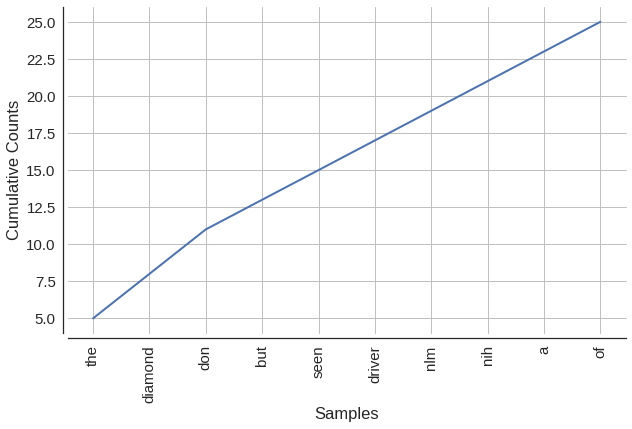

In [98]:
# Number of elements to display
top_display=10
counts.tabulate(top_display)

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(10,6))
sns.set(style="white", font_scale=1.5)
sns.despine(offset=5)#, trim=True)
counts.plot(top_display, cumulative=True)
axs.set_title('Term Count')
plt.show()

Try cumulative=True in above plot and re run.

-----
## NLTK Corpus

The NLTK library includes a number of [data sets](http://www.nltk.org/nltk_data/) that can be downloaded and used directly from within NLTK. Lets use the NLTK [movie review corpus](http://www.cs.cornell.edu/people/pabo/movie-review-data/). 

In the following code cells, we access the movie review data set, display (part) of the data set's README (or general documentation), before we begin to process the words or terms in the corpus.

-----

In [99]:
# Access the NLTK movie review data set. 

mvr = nltk.corpus.movie_reviews

In [100]:
# Print the data set README
print(mvr.readme()[:200])

Sentiment Polarity Dataset Version 2.0
Bo Pang and Lillian Lee

http://www.cs.cornell.edu/people/pabo/movie-review-data/

Distributed with NLTK with permission from the authors.


Introduction


In [101]:
mvr_words = mvr.words()
counts  = nltk.FreqDist(mvr_words)
num_words = len(mvr_words)
num_tokens = len(counts)
lexdiv  =  num_words / num_tokens
print("Movie Review has {0} tokens and {1} words for a lexical diversity of {2:4.3f}".format(num_tokens, num_words, lexdiv))

Movie Review has 39768 tokens and 1583820 words for a lexical diversity of 39.826


In [102]:
pp.pprint(mvr.words()[:50])

[ 'plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party',
  ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an',
  'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his',
  'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',',
  'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?',
  'watch']


-----

The data are organized into separate files for each movie review. Since these reviews have an associated sentiment:? negative and positive, the reviews are categorized (via a directory structure) into `neg` or `pos` respectively. We can directly access a single review, which can be treated as a single text document. In the next few code cells we directly access the number of files, which can be used to count the number of reviews (assuming one review per file). We also display the contents of a single file, before displaying a subset of the files in one particular category, in this case `neg`, or negative reviews.

-----

In [103]:
# Each article is in a separate file

print('Total Number of reviews = {0}'.format(len(mvr.fileids())))

Total Number of reviews = 2000


In [104]:
a_filename = mvr.fileids()[0]
print('Example File: {0}'.format(a_filename))

Example File: neg/cv000_29416.txt


Display first 199 charcaters of the review

In [105]:
# Print part of the file
pp.pprint(mvr.raw(a_filename)[:199])

('plot : two teen couples go to a church party , drink and then drive . \n'
 'they get into an accident . \n'
 'one of the guys dies , but his girlfriend continues to see him in her life '
 ', and has nightmares . \n')


In [106]:
# Display article assigned categories
pp.pprint(mvr.categories())

['neg', 'pos']


In [107]:
# Find first 20 articles that have negative category
pp.pprint(mvr.fileids('neg')[:20])

[ 'neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt',
  'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt',
  'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt',
  'neg/cv009_29417.txt', 'neg/cv010_29063.txt', 'neg/cv011_13044.txt',
  'neg/cv012_29411.txt', 'neg/cv013_10494.txt', 'neg/cv014_15600.txt',
  'neg/cv015_29356.txt', 'neg/cv016_4348.txt', 'neg/cv017_23487.txt',
  'neg/cv018_21672.txt', 'neg/cv019_16117.txt']


-----

Given the contents of a file, we can process the associated text in the same manner as before. In this case, we tokenize one review into sentences as opposed to the traditional word tokens. The sents() function divides the text up into its sentences, where each sentence is a list of words:

-----

In [108]:
# Display sentances from an article

a_filename = 'neg/cv779_18989.txt'
for sent in mvr.sents(a_filename):
    pp.pprint(sent)

[ '9', ':', 'its', 'pathetic', 'attempt', 'at', '"', 'improving', '"', 'on',
  'a', 'shakespeare', 'classic', '.']
['8', ':', 'its', 'just', 'another', 'piece', 'of', 'teen', 'fluff', '.']
['7', ':', 'kids', 'in', 'high', 'school', 'are', 'not', 'that', 'witty', '.']
['6', ':', 'the', 'wittiness', 'is', 'not', 'witty', 'enough', '.']
['5', ':', 'the', 'comedy', 'is', 'not', 'funny', '.']
['4', ':', 'the', 'acting', 'is', 'poor', '.']
['3', ':', 'the', 'music', '.']
['2', ':', 'the', 'poster', '.']
['1', ':', 'its', 'worse', 'than', 'she', "'", 's', 'all', 'that', '!']
[ '10', '=', 'a', 'classic', '9', '=', 'borderline', 'classic', '8', '=',
  'excellent', '7', '=', 'good', '6', '=', 'better', 'than', 'average', '5',
  '=', 'average', '4', '=', 'disappointing', '3', '=', 'poor', '2', '=',
  'awful', '1', '=', 'a', 'crap', 'classic']


Here we are listing out words that are much longer than normal. As this simple example demonstrates, this can be a useful technique to search for potential problems, since in this case, none of the example shown are actual words.

In [109]:
# We can process the words with normal Python
# For example, print out really long words
long_words = [word for word in mvr_words if len(word) > 22]
long_words.sort(reverse=True)
pp.pprint(long_words)

[ 'uuuuuuggggggglllllllyyyyy', 's_funniest_home_videos_',
  '_the_last_days_of_disco_', '_i_know_what_you_did_last_summer_',
  '_fear_and_loathing_in_las_vegas_', '_breakfast_of_champions_',
  '_breakfast_of_champions_', '_a_night_at_the_roxbury_',
  '_a_night_at_the_roxbury_',
  '__________________________________________________________',
  '____________________________________________', '==========================',
  '========================', '=======================',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------']
